# Imports

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt 
import numpy as np

# Carregando dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

# Explorando dados

In [3]:
imagens_treino.shape ## mostra a quantidade de elementos do treino e que eles tão numa matriz 28x28
imagens_teste.shape ## mostra a quantidade de elementos do teste e que eles tão numa matriz 28x28
len(identificacoes_treino) ## mostra a quantidade de elementos da identifacação
identificacoes_treino.min() #descobre qual o menor valor de classificação
identificacoes_treino.max() #descobre qual o maior valor de classificação

9

# Exibir os dados

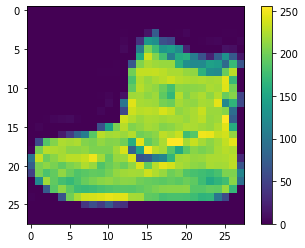

In [4]:
nomes_das_identificacoes = ['camiseta','calça', 'pullover', 'vestido', 
                            'casaco', 'sandália', 'camisa', 'tênis', 'bolsa', 'bota']

#plt.imshow(imagens_treino[0])
#plt.title(identificacoes_treino[0])
'''
for imagem in range(10):
    plt.subplot(2,5,imagem+1)
    plt.imshow(imagens_treino[imagem], cmap=plt.cm.gray)
    plt.title(nomes_das_identificacoes[identicacoes_treino[imagem]])
'''

plt.imshow(imagens_treino[0])
plt.colorbar()

# Criando o modelo e treinando

In [12]:
#normalização
imagens_treino = imagens_treino/float(255)

modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #camada 0 - entrada
    keras.layers.Dense(256, activation=tensorflow.nn.relu), #camada 1 - processamento 
    #keras.layers.Dropout(0.2), #camada para "adormecer" alguns processamentos
    keras.layers.Dense(10, activation=tensorflow.nn.softmax) #camada 2 - saída
])

modelo.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, #epochs = qtd  de vezes para treinar
           validation_split = 0.2) #validation_split separa 20% para validação
                                                                                    

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 56us/sample - loss: 1.0457 - accuracy: 0.6727 - val_loss: 0.6731 - val_accuracy: 0.7537
Epoch 2/5
48000/48000 [==============================] - 2s 50us/sample - loss: 0.6167 - accuracy: 0.7778 - val_loss: 0.5705 - val_accuracy: 0.7949
Epoch 3/5
48000/48000 [==============================] - 2s 48us/sample - loss: 0.5441 - accuracy: 0.8060 - val_loss: 0.5308 - val_accuracy: 0.8117
Epoch 4/5
48000/48000 [==============================] - 2s 51us/sample - loss: 0.5051 - accuracy: 0.8221 - val_loss: 0.4935 - val_accuracy: 0.8255
Epoch 5/5
48000/48000 [==============================] - 3s 53us/sample - loss: 0.4801 - accuracy: 0.8316 - val_loss: 0.4757 - val_accuracy: 0.8298


# Salvando o modelo e carregando

In [6]:
from tensorflow.keras.models import load_model

modelo.save("modelo.h5")
modelo_salvo = load_model("modelo.h5")

# plotando o gráfico de Acuracia x épocas

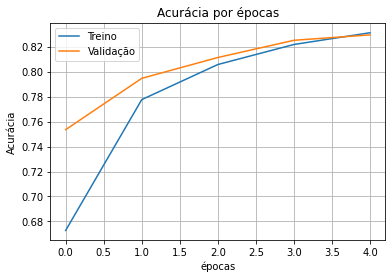

In [13]:
plt.plot(historico.history['accuracy']) # acuráciado teste
plt.plot(historico.history['val_accuracy']) #acurácia da validação
plt.title("Acurácia por épocas")
plt.xlabel("épocas")
plt.ylabel("Acurácia")
plt.legend(["Treino", "Validação"])
plt.grid()

# plotando o gráfico de Perda x épocas

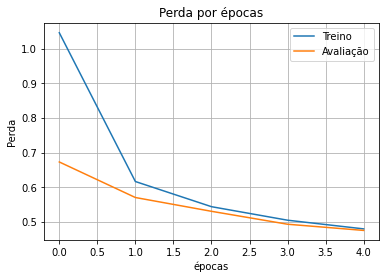

In [14]:
plt.plot(historico.history['loss']) # acuráciado teste
plt.plot(historico.history['val_loss']) #acurácia da validação
plt.title("Perda por épocas")
plt.xlabel("épocas")
plt.ylabel("Perda")
plt.legend(["Treino", "Avaliação"])
plt.grid()

# Testando o modelo

In [9]:
previsoes = modelo.predict(imagens_teste)
resultado = np.argmax(previsoes[0])
print("Resultado teste:", resultado)
print("Número da imagem: ", identificacoes_treino[0])

Resultado teste: 9
Número da imagem:  9


# Avaliando o modelo

In [10]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print("Perda do teste = %.3f     Acurácia do teste = %.3f" % (perda_teste, acuracia_teste))

10000/10000 [==============================] - 0s 30us/sample - loss: 52.7116 - accuracy: 0.8619
Perda do teste = 52.712     Acurácia do teste = 0.862


# Testando o modelo salvo

In [11]:
previsoes = modelo_salvo.predict(imagens_teste)
resultado = np.argmax(previsoes[0])
print("Resultado teste:", resultado)
print("Número da imagem: ", identificacoes_treino[0])

Resultado teste: 9
Número da imagem:  9
